<div style="text-align:center; font-family:Tahoma, Arial; line-height:1.8;">

  <div style="font-size:42px; font-weight:bold; color:#0F8298;">
    Machine Learning 03
  </div>

  <div style="font-size:28px; font-weight:600; color:#6C3BAA; margin-top:8px;">
  Regression / Polynomial Regression
  </div>

  <div style="font-size:18px; color:#4b4f9c;">
</div>
رگرسیون چند جمله‌ای

<hr style="width:60%; margin:20px auto; border:1px solid #ddd;">

<font color=497890 size=3>

اهداف: : پس از تکمیل این تمرین شما قادر خواهید بود

بین رگرسیون خطی و غیرخطی تمایز قائل شوی 

برای پیاده‌سازی رگرسیون چندجمله‌ای استفاده کنید scikit-learn از کتابخانه‌ی

یک مدل ایجاد کنید، آن را آموزش دهید، آزمایش کنید و از مدل استفاده نمایید

<font color=GREEN size=5>
HAKAN Fatemi (www.hooko.ir)


____
</div> </div>

<h1>فهرست مطالب پیشرفته</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#download_data">دانلود دیتا</a></li>
        <li><a href="#polynomial_regression">آموزش مدل</a></li>
        <li><a href="#evaluation">ارزیابی</a></li>
        <li><a href="#practice">تمرین</a></li>
    </ol>
</div>
<br>
<hr>

.اگر نقاط داده شما به وضوح با رگرسیون خطی (یک خط مستقیم از طریق تمام نقاط داده) مطابقت ندارند، ممکن است برای رگرسیون چندجمله‌ای ایده‌آل باشد

In [18]:
# برای نصب کتابخانه‌ها دستور زیر را ران کنید
# ! pip install numpy

In [19]:
import matplotlib.pyplot as plt
import numpy

In [20]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

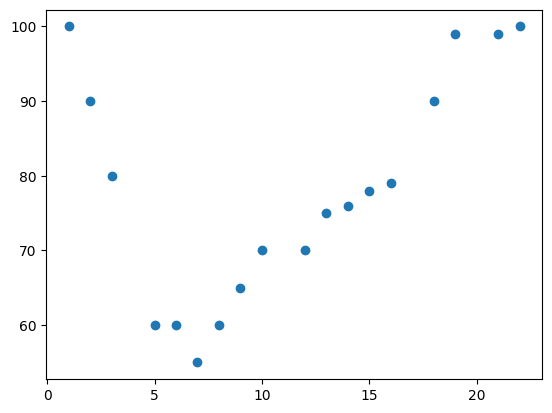

In [21]:
plt.scatter(x, y)
plt.show()

In [22]:
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1, 22, 100)

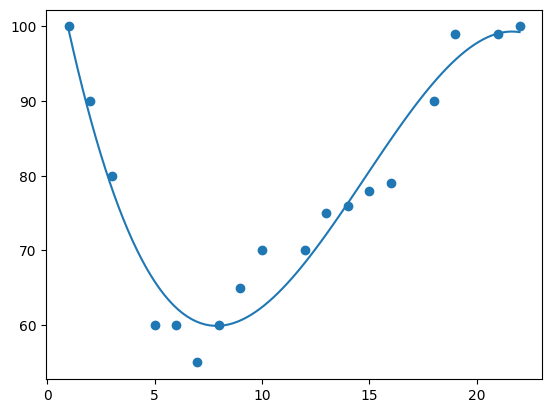

In [23]:
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [24]:
from sklearn.metrics import r2_score

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.9432150416451026


### پیش‌بینی مقادیر آینده

In [25]:
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

speed = mymodel(17)
print(speed)

88.87331269698001


این مثال سرعت ۸۸.۸۷ را پیش‌بینی کرد که می‌توانیم آن را از نمودار نیز بخوانیم

## تناسب نامناسب؟

In [26]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

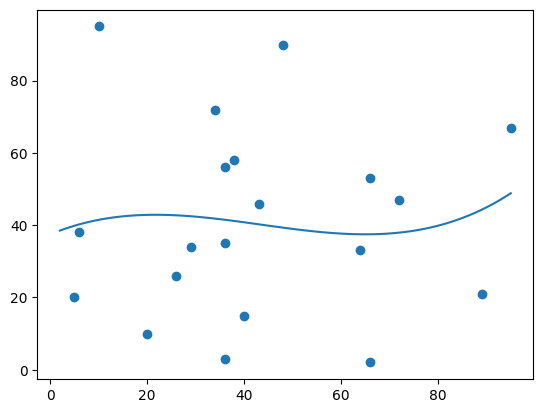

In [27]:
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(2, 95, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [28]:
from sklearn.metrics import r2_score

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.009952707566680652


___
___
___
# نسخه‌ی پیشرفته
___
___
___

### Importing Needed packages


In [29]:
# برای نصب کتابخانه‌ها دستور زیر را ران کنید
# ! pip install pylab

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

<h2 id="download_data">Downloading Data</h2>

In [31]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
response = requests.get(url)

with open("FuelConsumptionCo2.csv", "wb") as f:
    f.write(response.content)

## درک داده‌ها

### `FuelConsumption.csv`:

[منبع مجموعه‌داده](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

ویژگی‌های داده‌ها شامل موارد زیر هستند:

* **MODELYEAR** : سال مدل
* **MAKE** : شرکت سازنده
* **MODEL** : مدل خودرو
* **VEHICLE CLASS** : کلاس یا نوع خودرو
* **ENGINE SIZE** : حجم موتور
* **CYLINDERS** : تعداد سیلندرها
* **TRANSMISSION** : نوع جعبه‌دنده 
* **FUEL CONSUMPTION in CITY (L/100 km)** : مصرف سوخت در شهر
* **FUEL CONSUMPTION in HWY (L/100 km)** : مصرف سوخت در بزرگراه
* **FUEL CONSUMPTION COMB (L/100 km)** : مصرف سوخت ترکیبی 
* **CO2 EMISSIONS (g/km)** : CO₂ میزان انتشار


## خواندن داده‌ها


In [32]:
df = pd.read_csv("FuelConsumptionCo2.csv")

# نگاهی به مجموعه‌داده بیندازید
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


بیایید چند ویژگی را که می‌خواهیم برای رگرسیون استفاده کنیم، انتخاب کنیم

In [33]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


ترسیم کنیم (Engine size) را نسبت به حجم موتور (Emission) بیایید مقادیر انتشار

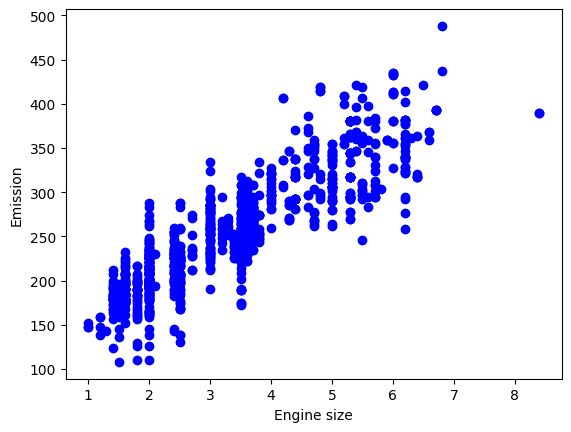

In [34]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### ایجاد مجموعه داده‌های آموزشی و آزمایشی

In [35]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="polynomial_regression">Polynomial regression</h2>


:می‌توانیم چند ویژگی اضافی ایجاد کنیم


$$1, x, x^2$$

$$y = β₀ + β_1 x + β_2 x^2$$


In [36]:
# برای نصب کتابخانه دستور زیر را ران کنید
# !pip install scikit-learn==0.23.1

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]], shape=(863, 3))

___
ما را دریافت می‌کند و خروجی آن،(x) مقادیر **fit_transform** تابع

فهرستی از داده‌ها است که از توان ۰ تا توان ۲ افزایش یافته‌اند (چون درجه چندجمله‌ای را ۲ تنظیم کرده‌ایم)


$$
\begin{bmatrix}
v_1\\
v_2\\
\vdots\\
v_n
\end{bmatrix}
\longrightarrow
\begin{bmatrix}
1 & v_1 & v_1^2\\
1 & v_2 & v_2^2\\
\vdots & \vdots & \vdots\\
1 & v_n & v_n^2
\end{bmatrix}
$$

$$
\begin{bmatrix}
2\\
2.4\\
1.5\\
\vdots
\end{bmatrix}
\longrightarrow
\begin{bmatrix}
1 & 2 & 4\\
1 & 2.4 & 5.76\\
1 & 1.5 & 2.25\\
\vdots & \vdots & \vdots
\end{bmatrix}
$$


$$y = \beta_0 + \beta_1  x^1 + \beta_2 x^2$$

In [38]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         52.08439511 -1.73522345]]
Intercept:  [105.11616457]


Text(0, 0.5, 'Emission')

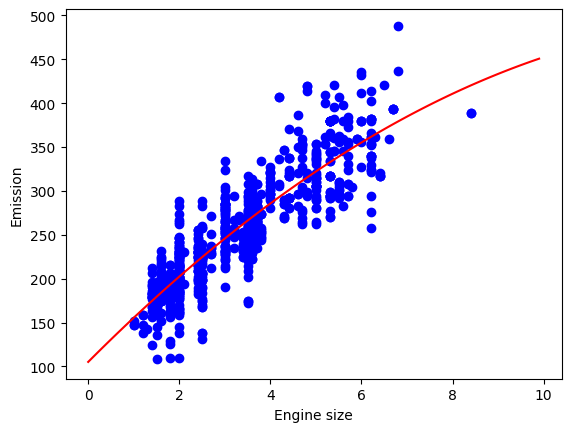

In [39]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

<h2 id="evaluation">Evaluation (ارزیابی)</h2>


In [40]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 24.73
Residual sum of squares (MSE): 1047.40
R2-score: 0.76


سعی کنید از **رگرسیون چندجمله‌ای** با همان مجموعه‌داده استفاده کنید، اما این بار با درجه سه آیا دقت مدل بهتر می‌شود؟


<details><summary>برای مشاهده جواب کیک کنید</summary>

```python
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y3_ ) )

```

</details>



<h2>می‌خواهید بیشتر یاد بگیرید؟</h2>

پلتفرم **هوکو** یک بستر جامع تحلیلی و هوش مصنوعی است که مجموعه‌ای از الگوریتم‌های یادگیری ماشین، ابزارهای تحلیل داده و راهکارهای پیش‌بینی هوشمند را در اختیار شما قرار می‌دهد.
این پلتفرم به شما کمک می‌کند تا تصمیم‌های دقیق‌تر، سریع‌تر و مبتنی بر داده بگیرید؛ 

چه به‌صورت فردی، چه در سطح تیمی و یا در مقیاس سازمانی

___

اکنون می‌توانید نسخه آزمایشی رایگان هوکو را فعال کرده و قدرت هوش مصنوعی را در تصمیم‌گیری‌های خود تجربه کنید

 <a href="https://hooko.ir">HOOKO.ir شروع تجربه در </a>

 ___

## Author

Mahdi Fatemi (HAKAN)

Instagram: @Fatemi_303

09220630140

## web
www.hooko.ir

## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2025-11-06 | 1.0  | HAKAN Fatemi  |  ... |

## <h3 align="center"> © HOOKO.IR Corporation. All rights reserved. <h3/>
